# Исследование "От чего зависит успех игры?"

## Описание проекта
Интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры, доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Цели проекта
- Изучить данные о выпускх видеоигр;
- Составить портрет пользователя для регионов (NA, EU, JP);
- Проверить две гипотезы (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные;
- Сделать прогноз на следующий год.

## Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы
1. Изучить данные
2. Обработать данные
3. Посмотреть на портреты пользователей из разных регионов
4. Проверить гипотезы
5. Визуализировать результаты
6. Сделать прогноз на следующий год

### Изучение общей информации о файле

Откроем датасет и проверим информацию о нём

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import scipy.stats as st

In [6]:
data = pd.read_csv('/datasets/games.csv')

In [7]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

Первое, что бросается в глаза, неправильный регистр в заголовках столбцов, изменим это

In [9]:
data.columns= data.columns.str.lower()

Изменим тип данных в столбце `year_of_release`, чтобы год у нас был целым числом, а не числом с точкой

In [10]:
data['year_of_release'] = pd.array(data['year_of_release'], dtype=pd.Int64Dtype())

В столбце `rating` у нас хранятся значения рейтинга по системе ESRB. Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

Описание значений:
- `«EC»` («Early childhood») — «Для детей младшего возраста»;
- `«E»` («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults");
- `«E10+»` («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- `«T»` («Teen») - «Подросткам» - Игра подходит для лиц от 13 лет;
- `«M»` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;
- `«AO»` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
- `«RP»` («Rating Pending») — «Рейтинг ожидается»

В столбце `rating` менять тип данных не будем, потому что данные представлены в строковом формате, но стоит заменить значение `К-А`, потому что это тоже самое, что и `Е`, пропуски в столбце заменим на несущуествующее значение, чтобы в дальнейшем можно было работать с этим столбцом

In [11]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [12]:
data['rating'] = data['rating'].replace('K-A','E')

In [13]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', nan], dtype=object)

In [14]:
data['rating'].isna().sum()

6766

In [15]:
data['rating'] = data['rating'].fillna(1000)

In [16]:
data['rating'].isna().sum()

0

Псмотрим уникальные значения в столбце `user_score`, и увидим, что в данных есть значение `tbd`, мы можем это исправить применив метод `to_numeric` библиотеки пандас, где значение параметра `errors` будет `coerce` (некорректные значения принудительно заменяются на NaN)

In [17]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [18]:
len(data['user_score'])

16715

In [19]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [20]:
len(data['user_score'])

16715

In [21]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [22]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [23]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,1000
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,1000


У нас есть пропуски в названии игр, годе производства, жанре, а также в столбцах с оценкой от критиков, пользователей и рейтинге игр, их менять не имеет смысла, во избежании искожения данных. Причины пропусков могут быть различны, например, невнимательность создателей таблицы или отказ от проведения опроса по рейтингу по какой-то из игр

Посмотри конкретнее на пропуски с менем игры и жанром, все они лежат в двух строках, поэтому удалим их

In [24]:
data.drop(labels = [699,14244], axis = 0, inplace = True)

Добавим столбец в таблицу с суммой продаж по всем регионам и посмотрим суммы продаж в каждом регионе

In [25]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
data['na_sales'].sum()

4401.97

In [27]:
data['eu_sales'].sum()

2424.6000000000004

In [28]:
data['jp_sales'].sum()

1297.33

In [29]:
data['other_sales'].sum()

789.5000000000001

Проверим

In [30]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,1000,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,1000,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,1000,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,1000,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,1000,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,1000,0.01


По данным из добавленных столбцов можно сделать вывод, что с 1980 года по 2016 год самые высокие продажи были в Северной Америке, а самые низкие в других странах, например, России или Китае

Проверим датафрейм на наличие дубликатов

In [31]:
data.duplicated().sum()

0

In [32]:
data['name'].duplicated().sum()

5153

Явных дубликатов строк в датасете нет, есть в столбце `name` и в других столбца, это можно объяснить тем, игры выходят не только на одной платформе, но и на других

### Проведение исследовательского анализа данных

Посмотрим количество игр, которые выпускались в разные годы

In [33]:
data['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1426
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

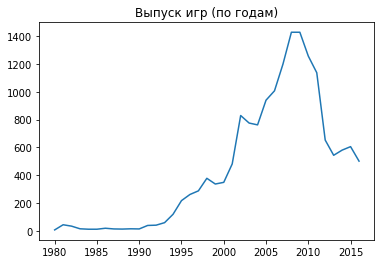

In [34]:
data['year_of_release'].value_counts().sort_index().plot( title = 'Выпуск игр (по годам)');

Данные за весь период времени не так важны для целей нашего исследования, к тому же сравнивать 9 игр в 1980 году и 1427 в 2008, будет не совсем корректно. Поэтому возьмем данные за последние 3 года для построения более точного прогноза на 2017 год

Посмотрим как менялись продажи по платформам, для этого возьмём ТОП-10 самых продаваемых платформ

In [35]:
pl = data.groupby('platform',as_index = False)['total_sales'].sum().round(2)

In [36]:
top_10 = pl.sort_values(by = 'total_sales',ascending = False).head(10)

In [37]:
top_10 = top_10['platform'].to_list()

Теперь у нас есть ТОП-10 самых продаваемых платформ, возьмём эти значения и создадим список из этих платформ. Теперь, когда у нас есть список нужных нам платформ, отберем данные из датасета, которые соответствуют условию, и присвоем их переменной `data_2`

In [38]:
top_10

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [39]:
data_2 = data.query('platform in @top_10')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12818 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12818 non-null  object 
 1   platform         12818 non-null  object 
 2   year_of_release  12614 non-null  Int64  
 3   genre            12818 non-null  object 
 4   na_sales         12818 non-null  float64
 5   eu_sales         12818 non-null  float64
 6   jp_sales         12818 non-null  float64
 7   other_sales      12818 non-null  float64
 8   critic_score     6402 non-null   float64
 9   user_score       6024 non-null   float64
 10  rating           12818 non-null  object 
 11  total_sales      12818 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.3+ MB


Теперь на основе этих данных, мы можем построить график "живучести" платформ, и увидеть, что в среднем платформы изживают себя за период примерно 10 лет, за исключением платформы `PC`, которая существует с 1985 года и удерживает свои позиции до сих пор

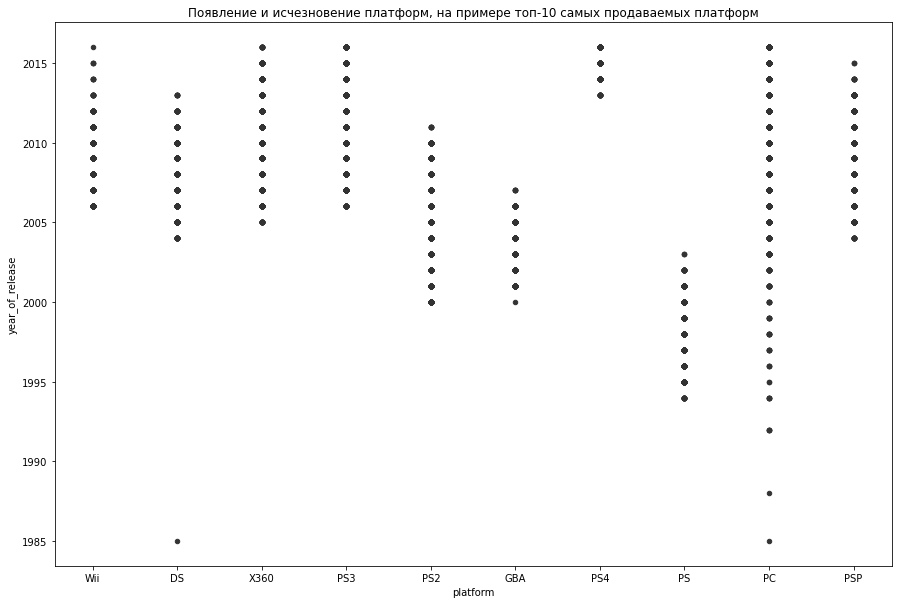

In [40]:
data_2.plot(x = 'platform', y = 'year_of_release', kind = 'scatter', c = ['0.2'],\
            title = 'Появление и исчезновение платформ, на примере топ-10 самых продаваемых платформ',\
           figsize = (15,10));

Теперь сделаем срез из основного датафрейма с данными с 2014 года по 2016 год и поместим его в переменную `actual_period` для дальнейших задач и в переменную `data_3`, которую будем изменять

In [41]:
years = [2014, 2015, 2016]

In [42]:
actual_period = data.query('year_of_release in @years')

In [43]:
data_3 = data.query('year_of_release in @years')
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


Посмотрим какие платформы лидируют по продажам в этот период

In [44]:
data_3.groupby('platform')['total_sales'].sum().round(2).sort_values(ascending = False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

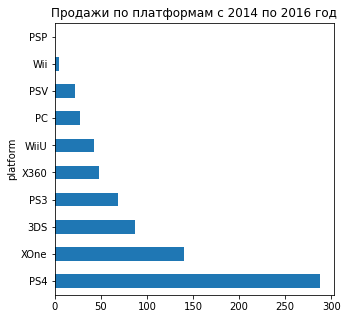

In [45]:
data_3.groupby('platform')['total_sales'].sum().round(2).sort_values(ascending = False)\
.plot(x = 'platform',kind = 'barh',figsize =  (5,5), title = 'Продажи по платформам с 2014 по 2016 год');

По данным видно, что явным лидером является платформа `PS4`, за ней `XOne`,`3DS`, `PS3` и `X360`, эту пятерку используем для построения графика "ящик с усами", чтобы посмотреть как продавались данные платформы в период с 2014 по 2016 год

In [46]:
data_3 = data_3.groupby('platform',as_index = False)['total_sales'].sum().round(2)\
.sort_values(by = 'total_sales',ascending = False).head(5)

In [47]:
top_5 = data_3['platform'].to_list()

In [48]:
top_5

['PS4', 'XOne', '3DS', 'PS3', 'X360']

Сделаем запрос к датафрейму с продажами по ТОП 5 платформ в период с 2014 по 2016 год и поместим в переменную `data_4`

In [49]:
data_4 = data.query('platform in @top_5 & year_of_release in @ years')
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 31 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1146 non-null   object 
 1   platform         1146 non-null   object 
 2   year_of_release  1146 non-null   Int64  
 3   genre            1146 non-null   object 
 4   na_sales         1146 non-null   float64
 5   eu_sales         1146 non-null   float64
 6   jp_sales         1146 non-null   float64
 7   other_sales      1146 non-null   float64
 8   critic_score     505 non-null    float64
 9   user_score       643 non-null    float64
 10  rating           1146 non-null   object 
 11  total_sales      1146 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 117.5+ KB


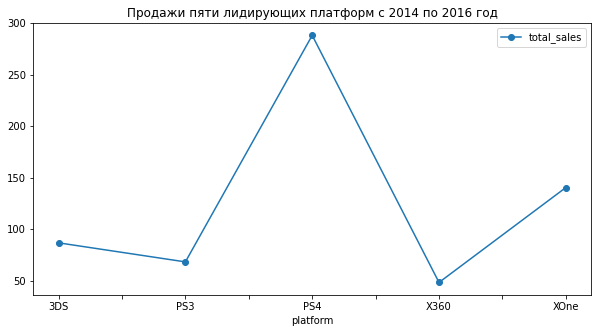

In [50]:
pd.pivot_table(data_4,index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(title = 'Продажи пяти лидирующих платформ с 2014 по 2016 год', figsize = (10,5), style = 'o-');

Было принято решение построить два графика "ящик с усами" для указания различий данных и демонстрации того, что можно потерять значимые данные, если строить график с параметром `showfliers`

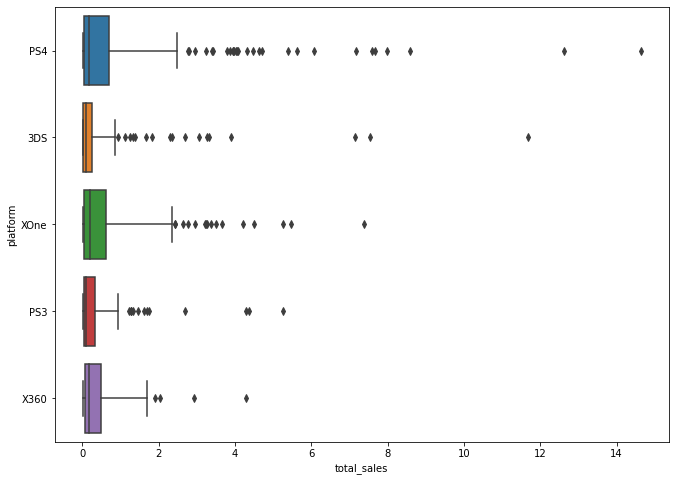

In [51]:
sns.boxplot(data = data_4, x = 'total_sales', y = 'platform', whis=3)
fig = plt.gcf()
fig.set_size_inches(11, 8)

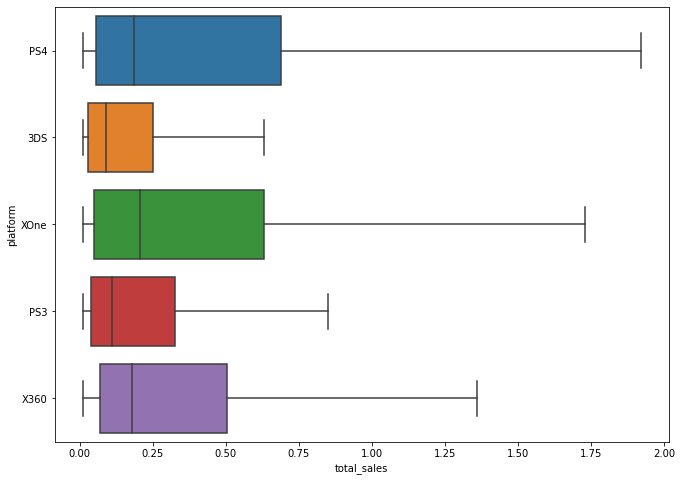

In [52]:
sns.boxplot(data = data_4, x = 'total_sales', y = 'platform', whis=2, showfliers = False)
fig = plt.gcf()
fig.set_size_inches(11, 8)

Из графиков видно, что наибольшие продажи были у платформ `PS4`, за ней с отрывом в половину продаж идет `XOne`, маленькие продажи остальных платформ, возможно связаны с окончанием их "расцвета" и появлением новых платформ

Рассмотрим зависимость продаж платформ от отзывов, на примере платформ `XOne` и `3DS` 

In [53]:
xone = actual_period.query('platform == "XOne" ')

Посмотрим зависимость продаж от оценок пользователей и отобразим это на графике, тоже самое сделаем с оценками критиков

In [54]:
xone['user_score'].corr(xone['total_sales'])

-0.0703839280647581

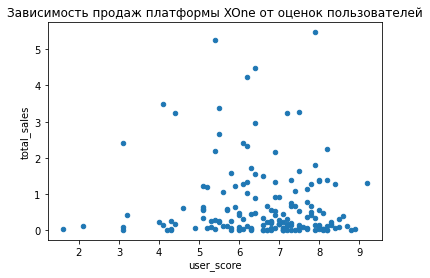

In [55]:
xone.plot(x = 'user_score', y = 'total_sales', kind = 'scatter',\
          title = 'Зависимость продаж платформы XOne от оценок пользователей');

In [56]:
xone['critic_score'].corr(xone['total_sales'])

0.42867694370333226

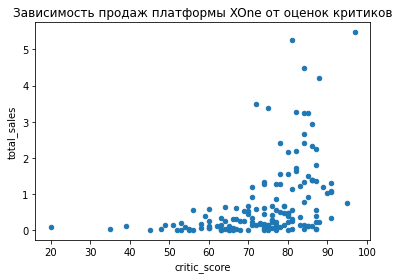

In [57]:
xone.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter',\
          title = 'Зависимость продаж платформы XOne от оценок критиков');

Из графиков видно среднюю зависимость продаж платформы от отзывов критиков, и почти нулевую зависимость от отзывов пользователей 

In [58]:
ds = actual_period.query('platform == "3DS"')

In [59]:
ds['user_score'].corr(ds['total_sales'])

0.2151932718527028

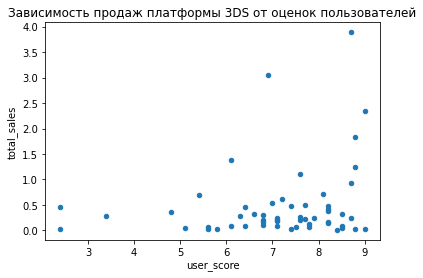

In [60]:
ds.plot(x = 'user_score', y = 'total_sales', kind = 'scatter',\
        title = 'Зависимость продаж платформы 3DS от оценок пользователей');

In [61]:
ds['critic_score'].corr(ds['total_sales'])

0.314117492869051

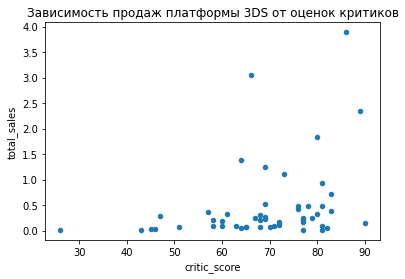

In [62]:
ds.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', title = 'Зависимость продаж платформы 3DS от оценок критиков');

По продажам платформы `3DS` зависимость от оценки пользователей и критиков почти одинакова

Посмотрим какой жанр игр приносит наибольшие продажи в актуальном периоде, из таблицы ниже видно, всего жанров у нас 12, чаще продаются игры жанра `Shooter`, а игры жанра `Advanture` меньше пользуются популярностью у любителей видеоигр 

In [63]:
genre = actual_period.groupby('genre')['total_sales'].mean().sort_values(ascending = False)

In [64]:
genre

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64

### Составление портрета пользователя каждого региона (NA, EU, JP)

Посмотрим на портреты пользователей в разных регионах за период с 2014 по 2016 год

In [65]:
na = actual_period.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5).to_frame()

In [66]:
eu = actual_period.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5).to_frame()

In [67]:
jp = actual_period.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5).to_frame()

In [68]:
na.join(eu, lsuffix = '2', how = 'outer').join(jp, lsuffix='3', how = 'outer')\
.sort_values(by = ['na_sales', 'eu_sales','jp_sales'])

,na_sales,eu_sales,jp_sales
platform,,,
PS3,22.05,25.54,11.22
3DS,22.64,16.12,44.24
X360,28.30,NaN,NaN
XOne,81.27,46.25,NaN
PS4,98.61,130.04,15.02
PC,NaN,17.97,NaN
WiiU,NaN,NaN,7.31
PSV,NaN,NaN,14.54


Во всех трех регионах присутствуют платформы `PS4`,`3DS` и `PS3`, в Америке и Европе также пользуется популярностью платформа `XOne`, в Японии предпочтительны другие платформы - `WiiU` и `PSV`

In [69]:
na2 = actual_period.groupby('genre')['na_sales'].mean().sort_values(ascending = False).head(5).to_frame()

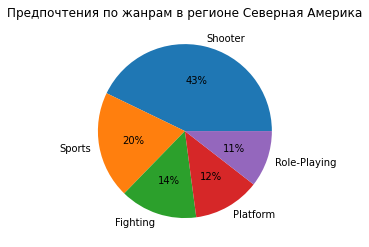

In [70]:
na2.plot(kind = 'pie', y = 'na_sales', autopct = '%1.0f%%', figsize=(8, 4), legend = False, ylabel = '',\
         title = 'Предпочтения по жанрам в регионе Северная Америка');

In [71]:
eu2 = actual_period.groupby('genre')['eu_sales'].mean().sort_values(ascending = False).head(5).to_frame()

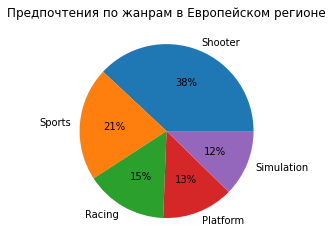

In [72]:
eu2.plot(kind = 'pie', y = 'eu_sales', autopct = '%1.0f%%', figsize=(8, 4), legend = False, ylabel = '',\
         title = 'Предпочтения по жанрам в Европейском регионе');

In [97]:
jp2 = actual_period.groupby('genre')['jp_sales'].mean().sort_values(ascending = False).head(5).to_frame()

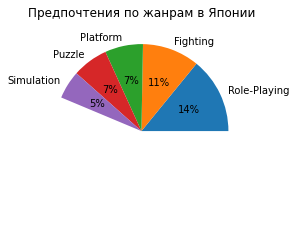

In [98]:
jp2.plot(kind = 'pie', y = 'jp_sales', autopct = '%1.0f%%', figsize=(8, 4), legend = False, ylabel = '',\
         title = 'Предпочтения по жанрам в Японии', normalize = False);

In [75]:
na2.join(eu2, lsuffix = '2', how = 'outer').join(jp2, lsuffix='3', how = 'outer')

,na_sales,eu_sales,jp_sales
genre,,,
Fighting,0.207167,NaN,0.106167
Platform,0.178684,0.178947,0.070789
Puzzle,NaN,NaN,0.066429
Racing,NaN,0.204783,NaN
Role-Playing,0.151448,NaN,0.140995
Shooter,0.617344,0.511875,NaN
Simulation,NaN,0.165909,0.052500
Sports,0.286522,0.284037,NaN


Во всех регионах предпочтения по жанрам разнообразные, например, в Америке, как и в Европе больше всего любят жанр `Shooter`, а в Японии предпочитают жанр `Platform` и `Puzzle`, вот почему японцы самая умная нация

In [76]:
actual_period.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

rating
M       96.42
1000    64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

In [77]:
actual_period.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

rating
M       93.44
1000    58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

In [78]:
actual_period.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

rating
1000    56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

В Европе и Америке люди предпочитают покупать игры для взрослых и это примерно 1/3 от всех продаж, а в Японии предпочитают "свой" рейтинг, именно он составляет половину продаж, возможно по причине того, что система оценки игр ESRB, была изобретена в Канаде и США, и не распространена в Японии

### Проверка гипотез

Проверим две гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки первого утверждения сформулируем 0 и альтернативную гипотезы:\
`H0`: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
`H1`: Средние пользовательские рейтинги платформ Xbox One и PC не равны

Для этого возьмем пользовательские рейтинги за весь период платформ `XOne` и `PS`

In [79]:
x = data.query('platform == "XOne"')

In [80]:
x = x['user_score'].dropna().to_list()

In [81]:
ps = data.query('platform == "PS"')

In [82]:
y = ps['user_score'].dropna().to_list()

Проверим гипотезу о равенстве среднего из двух генеральных совокупностей

In [83]:
results = st.ttest_ind(x,y)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.8107256198405024e-18
Отвергаем нулевую гипотезу


В данном случае средние пользовательские рейтинги платформ Xbox One и PC разные

Проверим второе утверждение:\
`H0`: Средние пользовательские рейтинги жанров Action и Sports разные\
`H1`: Средние рейтинги жанров Action и Sports одинаковые

In [84]:
act = data.query('genre == "Action"')

In [85]:
a = act['user_score'].dropna().to_list()

In [86]:
sport = data.query('genre == "Sports"')

In [87]:
b = sport['user_score'].dropna().to_list()

In [88]:
results = st.ttest_ind(a,b, equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.05763969046781938
Не получилось отвергнуть нулевую гипотезу


Здесь мы имеем дело с двусторонней гипотезой, поэтому мы делим значение p-value на 2

### Общий вывод

In [89]:
top_5

['PS4', 'XOne', '3DS', 'PS3', 'X360']

Проведя анализ по данным о компьютерных играх, можно сделать несколько выводов:
- В среднем платформы "живут" около 10 лет, за исключением редких экземпляров;
- Продажа игровой платформы имеет зависимость от оценки критиков в большей степени, чем от оценки пользователей;
- По прогнозам на 2017 год, рекомендую ориентироваться на платформы в `top_5`, исходя из данных о продажах за последние три года, за исключением платформы `3DS`, которая не является перспективной, исходя из теории о времени "жизни" платформы;
- По поводу жанров я бы посоветовала ориентрироваться на большую часть рынка и покупать игры с жанром `Shooter`, `Sports `,`
Platform`, `Fighting` и `Role-Playing`
- Также из-за того, что больше всего продаж в регионе Северной Америки, я бы закупила платформу `X360`, так как она является популярной в этом регионе